# Day 61: Introduction to Reinforcement Learning

## What is Reinforcement Learning?

Reinforcement Learning (RL) is a paradigm of machine learning where an agent learns to make decisions by interacting with an environment. Unlike supervised learning, where we learn from labeled examples, or unsupervised learning, where we find patterns in unlabeled data, reinforcement learning is about learning from experience through trial and error.

In RL, an agent takes actions in an environment, receives feedback in the form of rewards or penalties, and learns to maximize its cumulative reward over time. This approach is inspired by behavioral psychology and how humans and animals learn from consequences of their actions.

### Why Reinforcement Learning Matters

Reinforcement learning has powered some of the most impressive achievements in AI:
- **Game Playing**: DeepMind's AlphaGo defeated the world champion in Go, a game considered far more complex than chess
- **Robotics**: RL enables robots to learn complex manipulation tasks and locomotion
- **Autonomous Systems**: Self-driving cars, drones, and automated trading systems use RL
- **Personalization**: Recommendation systems that adapt to user behavior over time

### Learning Objectives

By the end of this lesson, you will be able to:
- Understand the key components of reinforcement learning (agent, environment, state, action, reward)
- Define and work with Markov Decision Processes (MDPs)
- Understand the Bellman equation and its role in RL
- Implement a simple RL environment
- Apply basic value iteration to solve an MDP
- Understand the exploration-exploitation tradeoff

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import random

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4


## Key Components of Reinforcement Learning

Reinforcement learning involves several key components that work together:

### 1. Agent
The **agent** is the learner or decision-maker. It observes the environment, takes actions, and learns from the consequences.

### 2. Environment
The **environment** is everything the agent interacts with. It responds to the agent's actions by transitioning to new states and providing rewards.

### 3. State (S)
A **state** is a representation of the current situation. It contains all relevant information needed to make a decision. The set of all possible states is called the state space, denoted as $\mathcal{S}$.

### 4. Action (A)
An **action** is a choice the agent can make. The set of all possible actions is called the action space, denoted as $\mathcal{A}$.

### 5. Reward (R)
A **reward** is a scalar feedback signal that indicates how good or bad an action was. The agent's goal is to maximize the cumulative reward over time. Rewards are denoted as $R_t$ at time step $t$.

### 6. Policy (π)
A **policy** is a strategy that the agent follows. It maps states to actions, either deterministically ($a = \pi(s)$) or stochastically ($\pi(a|s)$ = probability of taking action $a$ in state $s$).

### 7. Value Function (V)
The **value function** $V^{\pi}(s)$ represents the expected cumulative reward starting from state $s$ and following policy $\pi$:

$$V^{\pi}(s) = \mathbb{E}_{\pi}\left[\sum_{t=0}^{\infty} \gamma^t R_{t+1} \mid S_0 = s\right]$$

where $\gamma \in [0, 1]$ is the discount factor that determines how much we value future rewards.

### 8. Action-Value Function (Q)
The **action-value function** or **Q-function** $Q^{\pi}(s, a)$ represents the expected cumulative reward starting from state $s$, taking action $a$, and then following policy $\pi$:

$$Q^{\pi}(s, a) = \mathbb{E}_{\pi}\left[\sum_{t=0}^{\infty} \gamma^t R_{t+1} \mid S_0 = s, A_0 = a\right]$$

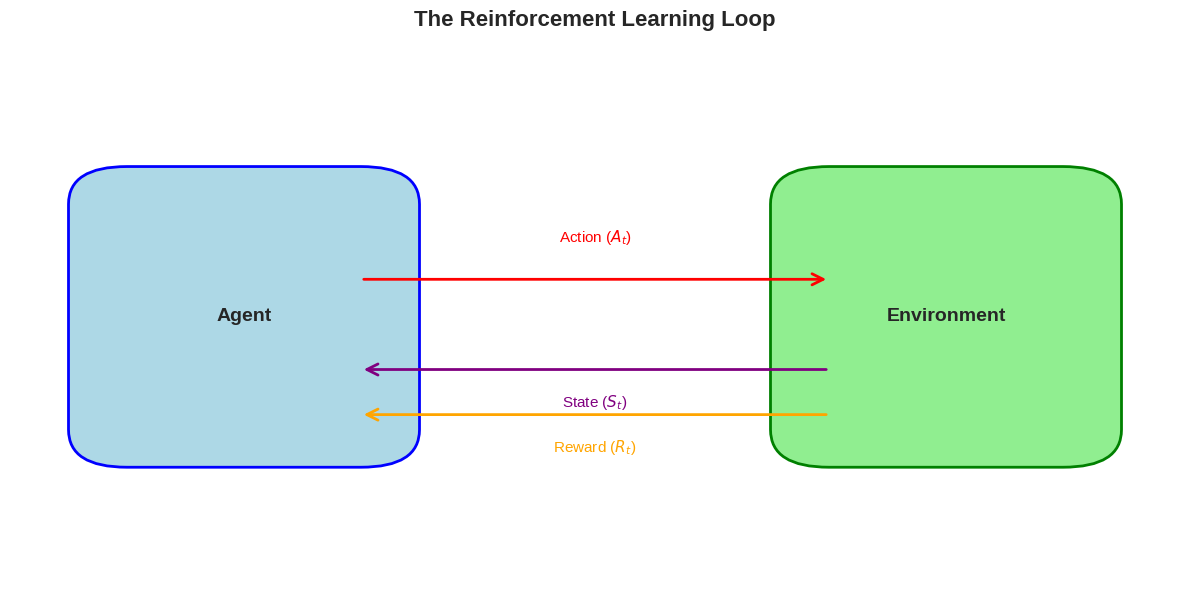

The agent-environment interaction:
1. Agent observes state S_t
2. Agent takes action A_t based on its policy
3. Environment transitions to new state S_{t+1}
4. Environment gives reward R_{t+1}
5. Process repeats...


In [2]:
# Visualize the RL interaction loop
fig, ax = plt.subplots(figsize=(12, 6))

# Create a simple flow diagram
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Agent box
agent_box = FancyBboxPatch((0.1, 0.5), 0.2, 0.3, boxstyle="round,pad=0.05",
                           edgecolor='blue', facecolor='lightblue', linewidth=2)
ax.add_patch(agent_box)
ax.text(0.2, 0.65, 'Agent', ha='center', va='center', fontsize=14, fontweight='bold')

# Environment box
env_box = FancyBboxPatch((0.7, 0.5), 0.2, 0.3, boxstyle="round,pad=0.05",
                         edgecolor='green', facecolor='lightgreen', linewidth=2)
ax.add_patch(env_box)
ax.text(0.8, 0.65, 'Environment', ha='center', va='center', fontsize=14, fontweight='bold')

# Arrows - Action
arrow1 = FancyArrowPatch((0.3, 0.7), (0.7, 0.7), arrowstyle='->',
                        mutation_scale=20, linewidth=2, color='red')
ax.add_patch(arrow1)
ax.text(0.5, 0.75, 'Action ($A_t$)', ha='center', fontsize=11, color='red')

# Arrows - State
arrow2 = FancyArrowPatch((0.7, 0.58), (0.3, 0.58), arrowstyle='->',
                        mutation_scale=20, linewidth=2, color='purple')
ax.add_patch(arrow2)
ax.text(0.5, 0.53, 'State ($S_t$)', ha='center', fontsize=11, color='purple')

# Arrows - Reward
arrow3 = FancyArrowPatch((0.7, 0.52), (0.3, 0.52), arrowstyle='->',
                        mutation_scale=20, linewidth=2, color='orange')
ax.add_patch(arrow3)
ax.text(0.5, 0.47, 'Reward ($R_t$)', ha='center', fontsize=11, color='orange')

ax.set_xlim(0, 1)
ax.set_ylim(0.3, 1)
ax.axis('off')
ax.set_title('The Reinforcement Learning Loop', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("The agent-environment interaction:")
print("1. Agent observes state S_t")
print("2. Agent takes action A_t based on its policy")
print("3. Environment transitions to new state S_{t+1}")
print("4. Environment gives reward R_{t+1}")
print("5. Process repeats...")

## Markov Decision Processes (MDPs)

Most reinforcement learning problems can be formalized as **Markov Decision Processes** (MDPs). An MDP is a mathematical framework for modeling decision-making in situations where outcomes are partly random and partly under the control of a decision-maker.

### Formal Definition

An MDP is defined by a tuple $(\mathcal{S}, \mathcal{A}, P, R, \gamma)$ where:

- $\mathcal{S}$: Set of states
- $\mathcal{A}$: Set of actions
- $P$: State transition probability function $P(s'|s, a)$ = probability of transitioning to state $s'$ given current state $s$ and action $a$
- $R$: Reward function $R(s, a, s')$ = immediate reward received after transitioning from state $s$ to state $s'$ due to action $a$
- $\gamma$: Discount factor $\gamma \in [0, 1]$

### The Markov Property

The key assumption in MDPs is the **Markov property**: the future is independent of the past given the present. Mathematically:

$$P(S_{t+1} | S_t, A_t, S_{t-1}, A_{t-1}, ..., S_0, A_0) = P(S_{t+1} | S_t, A_t)$$

This means that the current state contains all relevant information needed to predict the future. We don't need to know the entire history.

### The Bellman Equation

The **Bellman equation** expresses the relationship between the value of a state and the values of its successor states:

$$V^{\pi}(s) = \sum_{a} \pi(a|s) \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^{\pi}(s')\right]$$

This equation states that the value of a state equals the expected immediate reward plus the discounted value of the next state.

For the optimal value function $V^*(s)$, we have the **Bellman optimality equation**:

$$V^*(s) = \max_{a} \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma V^*(s')\right]$$

Similarly, for the Q-function:

$$Q^*(s, a) = \sum_{s'} P(s'|s,a) \left[R(s,a,s') + \gamma \max_{a'} Q^*(s', a')\right]$$

In [3]:
# Implement a simple Grid World environment
class GridWorld:
    """
    A simple grid world environment for RL.

    The agent starts at the top-left and must reach the goal at bottom-right.
    There are obstacles (walls) that the agent cannot pass through.

    States: (row, col) positions
    Actions: 0=Up, 1=Down, 2=Left, 3=Right
    Rewards: -1 for each step, +100 for reaching goal, -10 for hitting wall
    """

    def __init__(self, size=5):
        self.size = size
        self.start = (0, 0)
        self.goal = (size-1, size-1)
        self.obstacles = [(1, 1), (1, 2), (2, 3), (3, 1)]  # Wall positions
        self.state = self.start
        self.actions = ['Up', 'Down', 'Left', 'Right']

    def reset(self):
        """Reset environment to starting state"""
        self.state = self.start
        return self.state

    def step(self, action):
        """
        Take an action and return (next_state, reward, done)

        Actions: 0=Up, 1=Down, 2=Left, 3=Right
        """
        row, col = self.state

        # Determine next state based on action
        if action == 0:  # Up
            next_state = (max(0, row-1), col)
        elif action == 1:  # Down
            next_state = (min(self.size-1, row+1), col)
        elif action == 2:  # Left
            next_state = (row, max(0, col-1))
        elif action == 3:  # Right
            next_state = (row, min(self.size-1, col+1))
        else:
            next_state = self.state

        # Check if next state is an obstacle
        if next_state in self.obstacles:
            next_state = self.state  # Stay in place
            reward = -10  # Penalty for hitting wall
        elif next_state == self.goal:
            reward = 100  # Big reward for reaching goal
        else:
            reward = -1  # Small penalty for each step (encourages efficiency)

        done = (next_state == self.goal)
        self.state = next_state

        return next_state, reward, done

    def get_all_states(self):
        """Return all valid states"""
        states = []
        for i in range(self.size):
            for j in range(self.size):
                if (i, j) not in self.obstacles:
                    states.append((i, j))
        return states

# Create and test the environment
env = GridWorld(size=5)
print(f"Grid World Environment Created!")
print(f"Grid size: {env.size}x{env.size}")
print(f"Start state: {env.start}")
print(f"Goal state: {env.goal}")
print(f"Obstacles: {env.obstacles}")
print(f"Available actions: {env.actions}")
print(f"Total valid states: {len(env.get_all_states())}")

Grid World Environment Created!
Grid size: 5x5
Start state: (0, 0)
Goal state: (4, 4)
Obstacles: [(1, 1), (1, 2), (2, 3), (3, 1)]
Available actions: ['Up', 'Down', 'Left', 'Right']
Total valid states: 21


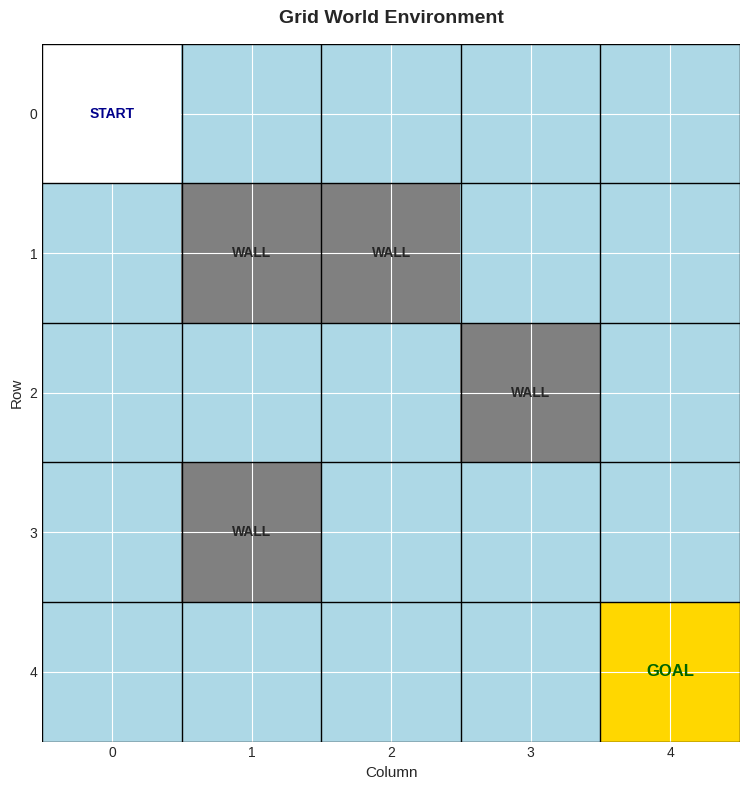


Legend:
- Light Blue: Start position
- Gold: Goal position
- Gray: Obstacles/Walls
- White: Empty cells


In [4]:
# Visualize the Grid World
def visualize_gridworld(env, values=None, policy=None, title="Grid World"):
    """Visualize the grid world with optional values and policy"""
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create grid
    grid = np.zeros((env.size, env.size))

    # Mark obstacles
    for obs in env.obstacles:
        grid[obs] = -1

    # Mark goal
    grid[env.goal] = 2

    # Mark start
    if env.start != env.goal:
        grid[env.start] = 1

    # Display grid
    cmap = plt.cm.colors.ListedColormap(['gray', 'lightblue', 'white', 'gold'])
    bounds = [-1.5, -0.5, 0.5, 1.5, 2.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    im = ax.imshow(grid, cmap=cmap, norm=norm)

    # Add grid lines
    for i in range(env.size + 1):
        ax.axhline(i - 0.5, color='black', linewidth=1)
        ax.axvline(i - 0.5, color='black', linewidth=1)

    # Add text labels
    for i in range(env.size):
        for j in range(env.size):
            if (i, j) in env.obstacles:
                ax.text(j, i, 'WALL', ha='center', va='center',
                       fontsize=10, fontweight='bold')
            elif (i, j) == env.goal:
                ax.text(j, i, 'GOAL', ha='center', va='center',
                       fontsize=12, fontweight='bold', color='darkgreen')
            elif (i, j) == env.start:
                ax.text(j, i, 'START', ha='center', va='center',
                       fontsize=10, fontweight='bold', color='darkblue')
            elif values is not None:
                # Display value
                val = values.get((i, j), 0)
                ax.text(j, i, f'{val:.1f}', ha='center', va='center',
                       fontsize=9)

            # Display policy arrow
            if policy is not None and (i, j) not in env.obstacles and (i, j) != env.goal:
                action = policy.get((i, j), None)
                if action is not None:
                    arrow_dict = {0: '↑', 1: '↓', 2: '←', 3: '→'}
                    offset = 0.25 if values is not None else 0
                    ax.text(j, i + offset, arrow_dict[action], ha='center', va='center',
                           fontsize=16, color='red', fontweight='bold')

    ax.set_xticks(range(env.size))
    ax.set_yticks(range(env.size))
    ax.set_xticklabels(range(env.size))
    ax.set_yticklabels(range(env.size))
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Column', fontsize=11)
    ax.set_ylabel('Row', fontsize=11)

    plt.tight_layout()
    plt.show()

# Visualize the initial grid world
visualize_gridworld(env, title="Grid World Environment")
print("\nLegend:")
print("- Light Blue: Start position")
print("- Gold: Goal position")
print("- Gray: Obstacles/Walls")
print("- White: Empty cells")

In [5]:
# Test the environment with a random episode
print("Testing the environment with random actions:\n")

env.reset()
episode_states = [env.state]
episode_actions = []
episode_rewards = []
total_reward = 0
done = False
step_count = 0
max_steps = 20  # Prevent infinite loops

while not done and step_count < max_steps:
    # Take a random action
    action = np.random.randint(0, 4)
    next_state, reward, done = env.step(action)

    episode_states.append(next_state)
    episode_actions.append(action)
    episode_rewards.append(reward)
    total_reward += reward

    print(f"Step {step_count + 1}: State {episode_states[step_count]} -> "
          f"Action {env.actions[action]} -> "
          f"Next State {next_state}, Reward {reward}")

    step_count += 1

print(f"\nEpisode finished!")
print(f"Total steps: {step_count}")
print(f"Total reward: {total_reward}")
print(f"Reached goal: {done}")

Testing the environment with random actions:

Step 1: State (0, 0) -> Action Left -> Next State (0, 0), Reward -1
Step 2: State (0, 0) -> Action Right -> Next State (0, 1), Reward -1
Step 3: State (0, 1) -> Action Up -> Next State (0, 1), Reward -1
Step 4: State (0, 1) -> Action Left -> Next State (0, 0), Reward -1
Step 5: State (0, 0) -> Action Left -> Next State (0, 0), Reward -1
Step 6: State (0, 0) -> Action Right -> Next State (0, 1), Reward -1
Step 7: State (0, 1) -> Action Up -> Next State (0, 1), Reward -1
Step 8: State (0, 1) -> Action Up -> Next State (0, 1), Reward -1
Step 9: State (0, 1) -> Action Left -> Next State (0, 0), Reward -1
Step 10: State (0, 0) -> Action Down -> Next State (1, 0), Reward -1
Step 11: State (1, 0) -> Action Left -> Next State (1, 0), Reward -1
Step 12: State (1, 0) -> Action Left -> Next State (1, 0), Reward -1
Step 13: State (1, 0) -> Action Left -> Next State (1, 0), Reward -1
Step 14: State (1, 0) -> Action Left -> Next State (1, 0), Reward -1
S

## Value Iteration: Solving MDPs

Now that we understand MDPs, let's learn how to solve them. **Value Iteration** is a dynamic programming algorithm that computes the optimal value function $V^*(s)$ for all states.

### Algorithm

Value iteration works by iteratively updating value estimates using the Bellman optimality equation:

1. Initialize $V(s) = 0$ for all states $s$
2. Repeat until convergence:
   - For each state $s$:
     - $V(s) \leftarrow \max_a \sum_{s'} P(s'|s,a)[R(s,a,s') + \gamma V(s')]$
3. Extract optimal policy: $\pi^*(s) = \arg\max_a \sum_{s'} P(s'|s,a)[R(s,a,s') + \gamma V(s')]$

### Discount Factor γ

The discount factor $\gamma \in [0, 1]$ controls how much we value future rewards:
- $\gamma = 0$: Only immediate rewards matter (myopic)
- $\gamma = 1$: All future rewards are equally important (far-sighted)
- $\gamma \in (0, 1)$: Balance between immediate and future rewards

Common values: $\gamma = 0.9$ or $\gamma = 0.99$

### Convergence

Value iteration is guaranteed to converge to the optimal value function $V^*$ for any finite MDP. The number of iterations depends on:
- The discount factor (smaller $\gamma$ converges faster)
- The convergence threshold
- The structure of the MDP

In [6]:
# Implement Value Iteration
def value_iteration(env, gamma=0.9, theta=1e-6, max_iterations=1000):
    """
    Value Iteration algorithm to find optimal value function and policy.

    Args:
        env: GridWorld environment
        gamma: Discount factor
        theta: Convergence threshold
        max_iterations: Maximum number of iterations

    Returns:
        V: Optimal value function (dict)
        policy: Optimal policy (dict)
        iterations: Number of iterations taken
    """
    # Initialize value function
    V = {state: 0.0 for state in env.get_all_states()}

    for iteration in range(max_iterations):
        delta = 0  # Track max change in values
        V_old = V.copy()

        # Update value for each state
        for state in env.get_all_states():
            if state == env.goal:
                continue  # Goal state has value 0

            # Compute value for each action
            action_values = []
            for action in range(4):  # 4 actions: up, down, left, right
                # Simulate taking action
                env.state = state
                next_state, reward, done = env.step(action)

                # Bellman update
                value = reward + gamma * V_old[next_state]
                action_values.append(value)

            # Take maximum over actions
            V[state] = max(action_values)
            delta = max(delta, abs(V[state] - V_old[state]))

        # Check convergence
        if delta < theta:
            print(f"Value Iteration converged in {iteration + 1} iterations")
            break

    # Extract optimal policy
    policy = {}
    for state in env.get_all_states():
        if state == env.goal:
            continue

        action_values = []
        for action in range(4):
            env.state = state
            next_state, reward, done = env.step(action)
            value = reward + gamma * V[next_state]
            action_values.append(value)

        policy[state] = np.argmax(action_values)

    return V, policy, iteration + 1

# Run Value Iteration
print("Running Value Iteration...\n")
env = GridWorld(size=5)
V_optimal, optimal_policy, num_iterations = value_iteration(env, gamma=0.9)

print(f"\nOptimal Value Function computed!")
print(f"Number of iterations: {num_iterations}")
print(f"\nSample state values:")
for state in [(0, 0), (0, 4), (2, 2), (4, 3)]:
    if state in V_optimal:
        print(f"  V({state}) = {V_optimal[state]:.2f}")

Running Value Iteration...

Value Iteration converged in 9 iterations



Optimal Value Function computed!
Number of iterations: 9

Sample state values:
  V((0, 0)) = 42.61
  V((0, 4)) = 70.19
  V((2, 2)) = 70.19
  V((4, 3)) = 100.00


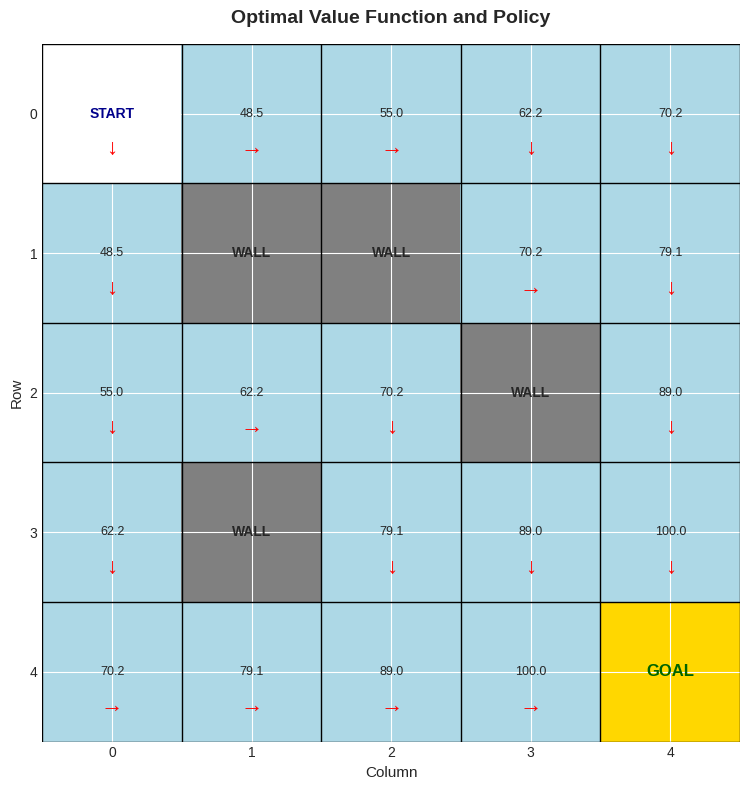


Visualization explanation:
- Numbers show the value V*(s) of each state
- Arrows show the optimal action to take (policy)
- The values represent expected cumulative reward from that state
- Notice how values increase as we get closer to the goal


In [7]:
# Visualize the optimal value function and policy
visualize_gridworld(env, values=V_optimal, policy=optimal_policy,
                   title="Optimal Value Function and Policy")

print("\nVisualization explanation:")
print("- Numbers show the value V*(s) of each state")
print("- Arrows show the optimal action to take (policy)")
print("- The values represent expected cumulative reward from that state")
print("- Notice how values increase as we get closer to the goal")

In [8]:
# Test the optimal policy
print("Testing the optimal policy:\n")

env.reset()
state = env.state
trajectory = [state]
total_reward = 0
done = False
step_count = 0

print(f"Starting at {state}")
while not done and step_count < 20:
    # Follow optimal policy
    action = optimal_policy.get(state, 0)
    next_state, reward, done = env.step(action)

    trajectory.append(next_state)
    total_reward += reward

    print(f"Step {step_count + 1}: {state} -> {env.actions[action]} -> {next_state} "
          f"(reward: {reward})")

    state = next_state
    step_count += 1

print(f"\nReached goal in {step_count} steps!")
print(f"Total reward: {total_reward}")
print(f"\nTrajectory: {' -> '.join([str(s) for s in trajectory])}")

Testing the optimal policy:

Starting at (0, 0)
Step 1: (0, 0) -> Down -> (1, 0) (reward: -1)
Step 2: (1, 0) -> Down -> (2, 0) (reward: -1)
Step 3: (2, 0) -> Down -> (3, 0) (reward: -1)
Step 4: (3, 0) -> Down -> (4, 0) (reward: -1)
Step 5: (4, 0) -> Right -> (4, 1) (reward: -1)
Step 6: (4, 1) -> Right -> (4, 2) (reward: -1)
Step 7: (4, 2) -> Right -> (4, 3) (reward: -1)
Step 8: (4, 3) -> Right -> (4, 4) (reward: 100)

Reached goal in 8 steps!
Total reward: 93

Trajectory: (0, 0) -> (1, 0) -> (2, 0) -> (3, 0) -> (4, 0) -> (4, 1) -> (4, 2) -> (4, 3) -> (4, 4)


## The Exploration-Exploitation Tradeoff

One of the fundamental challenges in reinforcement learning is the **exploration-exploitation tradeoff**:

### Exploitation
**Exploitation** means taking the action that you currently believe is best based on your knowledge. This maximizes immediate reward.

### Exploration
**Exploration** means trying actions that you haven't tried much (or at all) to gather more information. This might not maximize immediate reward but could lead to discovering better strategies.

### The Dilemma

- If you always **exploit**, you might miss better strategies you haven't discovered yet
- If you always **explore**, you waste time on suboptimal actions
- The optimal balance depends on:
  - How uncertain you are about action values
  - How much time you have left
  - The cost of exploration vs. the potential benefit

### Epsilon-Greedy Strategy

A simple but effective approach is **ε-greedy**:
- With probability $\epsilon$ (e.g., 0.1): choose a random action (explore)
- With probability $1 - \epsilon$: choose the best known action (exploit)

$$a_t = \begin{cases}
\text{random action} & \text{with probability } \epsilon \\
\arg\max_a Q(s, a) & \text{with probability } 1 - \epsilon
\end{cases}$$

### Decaying Epsilon

Often, we start with high exploration (large $\epsilon$) and gradually reduce it:
$$\epsilon_t = \epsilon_{\text{start}} \times (\epsilon_{\text{decay}})^t$$

This allows us to explore widely early on and exploit our knowledge later.

In [9]:
# Demonstrate epsilon-greedy exploration
def epsilon_greedy_episode(env, policy, epsilon=0.1, max_steps=50):
    """
    Run an episode using epsilon-greedy exploration.

    Args:
        env: Environment
        policy: Policy dictionary (state -> action)
        epsilon: Exploration probability
        max_steps: Maximum steps per episode

    Returns:
        total_reward: Cumulative reward
        steps: Number of steps taken
    """
    env.reset()
    state = env.state
    total_reward = 0
    done = False
    steps = 0

    while not done and steps < max_steps:
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.randint(0, 4)  # Explore: random action
        else:
            action = policy.get(state, 0)  # Exploit: use policy

        next_state, reward, done = env.step(action)
        total_reward += reward
        state = next_state
        steps += 1

    return total_reward, steps

# Compare different epsilon values
epsilon_values = [0.0, 0.1, 0.3, 0.5]
num_episodes = 100

results = {}
for eps in epsilon_values:
    rewards = []
    steps_list = []
    for _ in range(num_episodes):
        reward, steps = epsilon_greedy_episode(env, optimal_policy, epsilon=eps)
        rewards.append(reward)
        steps_list.append(steps)

    results[eps] = {
        'mean_reward': np.mean(rewards),
        'std_reward': np.std(rewards),
        'mean_steps': np.mean(steps_list)
    }

# Display results
print("Epsilon-Greedy Exploration Results (averaged over 100 episodes):\n")
print(f"{'Epsilon':<10} {'Mean Reward':<15} {'Std Reward':<15} {'Mean Steps':<12}")
print("-" * 55)
for eps in epsilon_values:
    print(f"{eps:<10.1f} {results[eps]['mean_reward']:<15.2f} "
          f"{results[eps]['std_reward']:<15.2f} {results[eps]['mean_steps']:<12.2f}")

print("\nObservations:")
print("- ε=0.0 (pure exploitation): Consistent performance, no exploration")
print("- ε=0.1 (small exploration): Slight variance, occasionally discovers alternatives")
print("- ε=0.3-0.5 (high exploration): More variance, takes longer on average")

Epsilon-Greedy Exploration Results (averaged over 100 episodes):

Epsilon    Mean Reward     Std Reward      Mean Steps  
-------------------------------------------------------
0.0        93.00           0.00            8.00        
0.1        91.13           3.30            8.88        
0.3        85.54           7.64            11.32       
0.5        76.25           13.40           15.57       

Observations:
- ε=0.0 (pure exploitation): Consistent performance, no exploration
- ε=0.1 (small exploration): Slight variance, occasionally discovers alternatives
- ε=0.3-0.5 (high exploration): More variance, takes longer on average


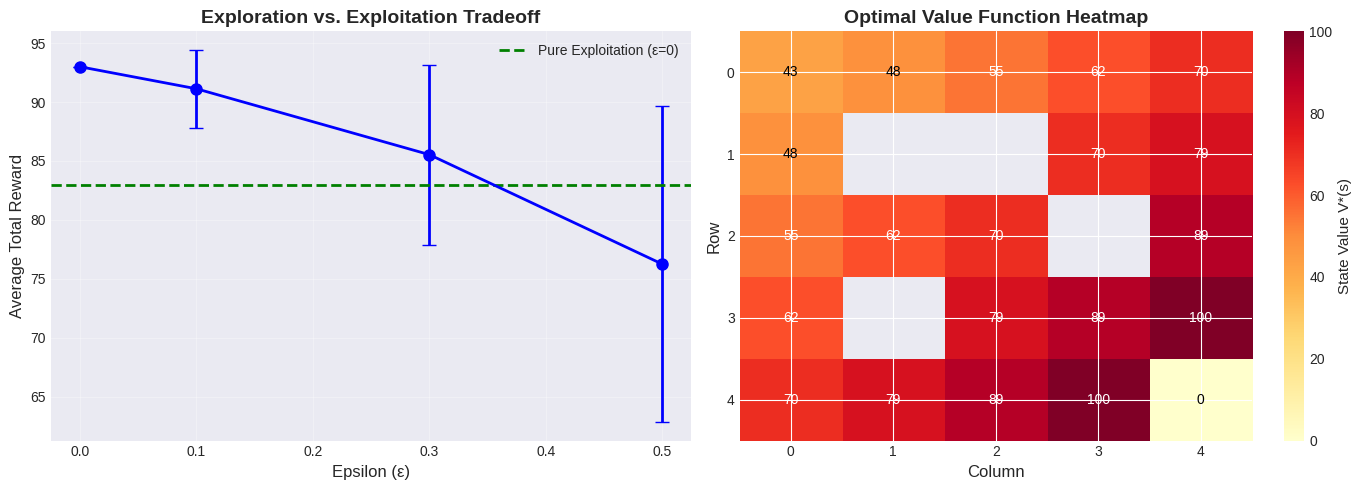

Heatmap interpretation:
- Brighter colors = higher value (better states)
- States closer to goal have higher values
- Obstacles block optimal paths, affecting nearby state values


In [10]:
# Visualize how performance improves with learning
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Average reward vs epsilon
eps_range = [results[eps]['mean_reward'] for eps in epsilon_values]
std_range = [results[eps]['std_reward'] for eps in epsilon_values]

ax1.errorbar(epsilon_values, eps_range, yerr=std_range, marker='o',
            markersize=8, capsize=5, linewidth=2, color='blue')
ax1.set_xlabel('Epsilon (ε)', fontsize=12)
ax1.set_ylabel('Average Total Reward', fontsize=12)
ax1.set_title('Exploration vs. Exploitation Tradeoff', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=83, color='green', linestyle='--', linewidth=2,
           label='Pure Exploitation (ε=0)')
ax1.legend()

# Plot 2: Value function heatmap
value_grid = np.zeros((env.size, env.size))
for (i, j), val in V_optimal.items():
    value_grid[i, j] = val

# Mask obstacles
for obs in env.obstacles:
    value_grid[obs] = np.nan

im = ax2.imshow(value_grid, cmap='YlOrRd', aspect='auto')
ax2.set_xlabel('Column', fontsize=12)
ax2.set_ylabel('Row', fontsize=12)
ax2.set_title('Optimal Value Function Heatmap', fontsize=14, fontweight='bold')
cbar = plt.colorbar(im, ax=ax2)
cbar.set_label('State Value V*(s)', fontsize=11)

# Add value labels
for i in range(env.size):
    for j in range(env.size):
        if (i, j) not in env.obstacles:
            text_color = 'white' if value_grid[i, j] > 50 else 'black'
            ax2.text(j, i, f'{value_grid[i, j]:.0f}',
                    ha='center', va='center', color=text_color, fontsize=10)

plt.tight_layout()
plt.show()

print("Heatmap interpretation:")
print("- Brighter colors = higher value (better states)")
print("- States closer to goal have higher values")
print("- Obstacles block optimal paths, affecting nearby state values")

## Hands-On Exercise: Modify the Grid World

Now it's your turn to experiment with reinforcement learning! Try the following exercises:

### Exercise 1: Change the Environment
Modify the grid world to create a different challenge:
- Change the grid size (e.g., 7x7 or 10x10)
- Add more obstacles in different positions
- Create a maze-like structure
- Add multiple goals with different rewards

### Exercise 2: Experiment with Discount Factor
Run value iteration with different discount factors:
- γ = 0.5 (myopic agent)
- γ = 0.99 (far-sighted agent)
- Compare the resulting policies and value functions

### Exercise 3: Analyze Convergence
- Track and plot the maximum value change (delta) at each iteration
- Experiment with different convergence thresholds (theta)
- Observe how this affects the number of iterations needed

### Exercise 4: Implement a Different Policy
- Implement a random policy (take random actions)
- Implement a greedy policy (always move toward goal in Manhattan distance)
- Compare their performance against the optimal policy

### Starter Code

Use the code below as a starting point:

Custom Grid World: 6x6
Obstacles: [(1, 1), (2, 2), (3, 3)]


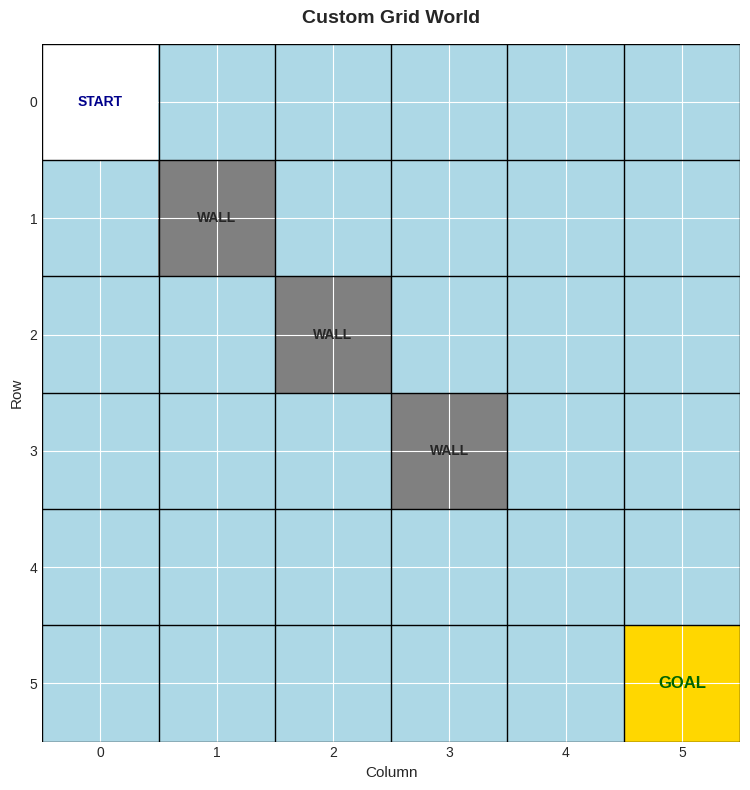


Try modifying the environment and re-running!
Experiment with different grid sizes, obstacles, and discount factors.


In [11]:
# Exercise: Create your own Grid World and solve it!

# TODO: Modify these parameters
custom_size = 6
custom_obstacles = [(1, 1), (2, 2), (3, 3)]
custom_gamma = 0.95

# Create custom environment
custom_env = GridWorld(size=custom_size)
custom_env.obstacles = custom_obstacles

print(f"Custom Grid World: {custom_size}x{custom_size}")
print(f"Obstacles: {custom_obstacles}")

# Visualize
visualize_gridworld(custom_env, title="Custom Grid World")

# TODO: Run value iteration with your custom environment
# V_custom, policy_custom, iterations = value_iteration(custom_env, gamma=custom_gamma)

# TODO: Visualize the results
# visualize_gridworld(custom_env, values=V_custom, policy=policy_custom,
#                    title="Custom Grid World - Optimal Policy")

print("\nTry modifying the environment and re-running!")
print("Experiment with different grid sizes, obstacles, and discount factors.")

## Key Takeaways

Congratulations! You've completed your introduction to Reinforcement Learning. Here are the key concepts you should remember:

### 1. Core RL Concepts
- **Agent**: The learner that makes decisions
- **Environment**: The world the agent interacts with
- **State**: Current situation
- **Action**: Choices available to the agent
- **Reward**: Feedback signal indicating quality of actions
- **Policy**: Strategy mapping states to actions

### 2. Markov Decision Processes
- MDPs provide a mathematical framework for sequential decision-making
- The Markov property: the future depends only on the present, not the past
- Components: States (S), Actions (A), Transition probabilities (P), Rewards (R), Discount factor (γ)

### 3. Value Functions
- **Value function V(s)**: Expected cumulative reward from state s
- **Q-function Q(s,a)**: Expected cumulative reward from state s taking action a
- The Bellman equation relates values of current and future states

### 4. Value Iteration
- Dynamic programming algorithm to find optimal policy
- Iteratively updates value estimates using Bellman optimality equation
- Guaranteed to converge to optimal solution for finite MDPs

### 5. Exploration vs. Exploitation
- Fundamental tradeoff in RL
- Exploration: Try new actions to gain information
- Exploitation: Use current knowledge to maximize reward
- ε-greedy: Simple strategy to balance both

### What You Can Do Now
- Define reinforcement learning problems as MDPs
- Implement value iteration to solve simple MDPs
- Understand the role of discount factors
- Apply epsilon-greedy exploration
- Visualize value functions and policies

### Next Steps
In the coming lessons, you'll learn:
- **Q-Learning**: Learn without knowing the environment model
- **Policy Gradient Methods**: Directly optimize the policy
- **Deep Reinforcement Learning**: Combine RL with neural networks
- **Advanced Applications**: Real-world RL systems

## Further Resources

Want to dive deeper into Reinforcement Learning? Here are some excellent resources:

### Books
1. **Sutton & Barto: "Reinforcement Learning: An Introduction" (2nd Edition)**
   - The definitive textbook on RL
   - Free PDF available: http://incompleteideas.net/book/the-book.html
   - Covers theory and algorithms in depth

2. **Grokking Deep Reinforcement Learning by Miguel Morales**
   - Practical, hands-on approach
   - Great for implementation details

### Online Courses
1. **David Silver's RL Course (DeepMind)**
   - Video lectures from a leading RL researcher
   - https://www.deepmind.com/learning-resources

2. **OpenAI Spinning Up in Deep RL**
   - Comprehensive educational resource
   - Includes code implementations
   - https://spinningup.openai.com/

3. **Coursera: Reinforcement Learning Specialization (University of Alberta)**
   - Taught by the authors of Sutton & Barto
   - Hands-on assignments

### Tutorials and Documentation
1. **Gymnasium (formerly OpenAI Gym)**
   - Standard toolkit for RL environments
   - https://gymnasium.farama.org/

2. **Stable Baselines3**
   - Reliable implementations of RL algorithms
   - https://stable-baselines3.readthedocs.io/

3. **CleanRL**
   - Single-file implementations of RL algorithms
   - Great for understanding implementations
   - https://github.com/vwxyzjn/cleanrl

### Papers (Advanced)
1. **"Playing Atari with Deep Reinforcement Learning"** - Mnih et al. (2013)
   - Introduced Deep Q-Networks (DQN)

2. **"Mastering the game of Go with deep neural networks"** - Silver et al. (2016)
   - AlphaGo paper

3. **"Proximal Policy Optimization Algorithms"** - Schulman et al. (2017)
   - PPO, one of the most popular modern RL algorithms

### Interactive Resources
1. **Reinforcement Learning Playground**
   - Interactive visualizations
   - https://cs.stanford.edu/people/karpathy/reinforcejs/

2. **GridWorld Playground**
   - Experiment with MDP solvers
   - http://cs.stanford.edu/people/karpathy/reinforcejs/gridworld_dp.html

### Communities
1. **r/reinforcementlearning** (Reddit)
   - Active community for discussions and questions

2. **RL Discord servers**
   - Real-time chat with other learners

### Practice Environments
1. **Gymnasium** - Classic control tasks
2. **PettingZoo** - Multi-agent environments
3. **MineRL** - Minecraft-based challenges
4. **Procgen** - Procedurally generated environments

Happy learning, and see you in the next lesson!